In [144]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [145]:
df_his=pd.read_json('XgAgFJ.json')

In [146]:
df_his.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17 15:30:18.044000+05:30,2025-01-17 15:30:18.044000+05:30,108,2,90 %,100,...,2025-01-17 15:18:30+05:30,2025-01-17 15:30:15+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17 15:17:44.056000+05:30,2025-01-17 15:17:44.056000+05:30,92,1,100 %,100,...,2025-01-17 15:07:45+05:30,2025-01-17 15:17:41+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682000+05:30,2025-01-16 20:13:19.699000+05:30,2025-01-16 20:13:19.699000+05:30,116,2,96 %,100,...,2025-01-16 20:01:10+05:30,2025-01-16 20:13:18+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562000+05:30,2025-01-16 20:00:11.573000+05:30,2025-01-16 20:00:11.573000+05:30,36,2,90 %,100,...,2025-01-16 19:52:57+05:30,2025-01-16 20:00:09+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462000+05:30,2025-01-15 20:34:39.478000+05:30,2025-01-15 20:34:39.478000+05:30,36,3,31 %,96,...,2025-01-15 20:21:25+05:30,2025-01-15 20:34:38+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [147]:
df_his.describe()

,id,quiz_id,score,trophy_level,speed,final_score,negative_score,correct_answers,incorrect_answers,better_than,total_questions,mistakes_corrected,initial_mistake_count
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000
mean,312368.428571,31.500000,60.285714,2.214286,95.071429,54.428571,5.857143,15.071429,5.857143,160.000000,55.50000,2.857143,8.714286
std,38889.139814,20.346045,34.675260,0.699293,7.216054,38.142878,6.948792,8.668815,6.948792,126.353594,35.01593,4.452435,6.462062
min,195808.000000,6.000000,12.000000,1.000000,78.000000,5.000000,0.000000,3.000000,0.000000,18.000000,20.00000,0.000000,0.000000
25%,316613.250000,18.000000,36.000000,2.000000,91.250000,24.750000,1.000000,9.000000,1.000000,55.250000,23.00000,0.000000,3.000000
50%,324964.000000,24.500000,46.000000,2.000000,100.000000,37.500000,3.000000,11.500000,3.000000,133.500000,48.00000,0.000000,8.000000
75%,332307.500000,51.000000,88.000000,3.000000,100.000000,88.000000,8.500000,22.000000,8.500000,246.750000,97.25000,3.750000,13.500000
max,336497.000000,58.000000,116.000000,3.000000,100.000000,115.000000,20.000000,29.000000,20.000000,395.000000,100.00000,12.000000,20.000000


In [148]:
df_h=df_his.drop(columns=['id'],axis=0)

In [149]:
df2=df_h
df2.head()

,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,final_score,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17 15:30:18.044000+05:30,2025-01-17 15:30:18.044000+05:30,108,2,90 %,100,105,...,2025-01-17 15:18:30+05:30,2025-01-17 15:30:15+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17 15:17:44.056000+05:30,2025-01-17 15:17:44.056000+05:30,92,1,100 %,100,92,...,2025-01-17 15:07:45+05:30,2025-01-17 15:17:41+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682000+05:30,2025-01-16 20:13:19.699000+05:30,2025-01-16 20:13:19.699000+05:30,116,2,96 %,100,115,...,2025-01-16 20:01:10+05:30,2025-01-16 20:13:18+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562000+05:30,2025-01-16 20:00:11.573000+05:30,2025-01-16 20:00:11.573000+05:30,36,2,90 %,100,35,...,2025-01-16 19:52:57+05:30,2025-01-16 20:00:09+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462000+05:30,2025-01-15 20:34:39.478000+05:30,2025-01-15 20:34:39.478000+05:30,36,3,31 %,96,16,...,2025-01-15 20:21:25+05:30,2025-01-15 20:34:38+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [150]:
df_h=df_his.drop(columns=['id','quiz_id'],axis=0)

In [151]:
df_h.head()

,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,final_score,negative_score,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:30:18.027000+05:30,2025-01-17 15:30:18.044000+05:30,2025-01-17 15:30:18.044000+05:30,108,2,90 %,100,105,3,...,2025-01-17 15:18:30+05:30,2025-01-17 15:30:15+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17 15:17:44.042000+05:30,2025-01-17 15:17:44.056000+05:30,2025-01-17 15:17:44.056000+05:30,92,1,100 %,100,92,0,...,2025-01-17 15:07:45+05:30,2025-01-17 15:17:41+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:13:19.682000+05:30,2025-01-16 20:13:19.699000+05:30,2025-01-16 20:13:19.699000+05:30,116,2,96 %,100,115,1,...,2025-01-16 20:01:10+05:30,2025-01-16 20:13:18+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16 20:00:11.562000+05:30,2025-01-16 20:00:11.573000+05:30,2025-01-16 20:00:11.573000+05:30,36,2,90 %,100,35,1,...,2025-01-16 19:52:57+05:30,2025-01-16 20:00:09+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15 20:34:39.462000+05:30,2025-01-15 20:34:39.478000+05:30,2025-01-15 20:34:39.478000+05:30,36,3,31 %,96,16,20,...,2025-01-15 20:21:25+05:30,2025-01-15 20:34:38+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [152]:
df_h=df_h.drop(columns=['submitted_at','created_at','updated_at'],axis=0)

In [153]:
#type is not vrying, drop it
df_h=df_h.drop(columns=['type'],axis=0)

In [154]:
df_h.head()

,user_id,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz
0,YcDFSO4ZukTJnnFMgRNVwZTE4j42,108,2,90 %,100,105,3,27,3,exam,2025-01-17 15:18:30+05:30,2025-01-17 15:30:15+05:30,15:00,107,100,Topic Rank - #-171,9,12,"{'2523': 10109, '2529': 10130, '2533': 10149, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
1,YcDFSO4ZukTJnnFMgRNVwZTE4j42,92,1,100 %,100,92,0,23,0,exam,2025-01-17 15:07:45+05:30,2025-01-17 15:17:41+05:30,15:00,395,23,Topic Rank - #-9140,3,3,"{'48': 192, '49': 197, '50': 199, '51': 203, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
2,YcDFSO4ZukTJnnFMgRNVwZTE4j42,116,2,96 %,100,115,1,29,1,live,2025-01-16 20:01:10+05:30,2025-01-16 20:13:18+05:30,15:00,115,100,Topic Rank - #-418,11,12,"{'2523': 10109, '2525': 10117, '2528': 10127, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."
3,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,2,90 %,100,35,1,9,1,live,2025-01-16 19:52:57+05:30,2025-01-16 20:00:09+05:30,15:00,152,23,Topic Rank - #-1598,1,2,"{'49': 197, '52': 208, '53': 212, '54': 217, '...","{'id': 6, 'name': None, 'title': 'Human Physio..."
4,YcDFSO4ZukTJnnFMgRNVwZTE4j42,36,3,31 %,96,16,20,9,20,exam,2025-01-15 20:21:25+05:30,2025-01-15 20:34:38+05:30,15:00,35,100,Topic Rank - #2023,0,20,"{'2521': 10099, '2523': 10107, '2532': 10145, ...","{'id': 51, 'name': None, 'title': 'Human Physi..."


In [155]:
df.duplicated

<bound method DataFrame.duplicated of                                                                    quiz
id                                                                   43
name                                                               None
title                 Structural Organisation in Animals and Plants (7)
description                                                            
difficulty_level                                                   None
topic                                Structural Organisation in Animals
time                                      2024-07-03T00:00:00.000+05:30
is_published                                                       True
created_at                                2024-07-03T11:00:08.958+05:30
updated_at                                2024-09-23T18:43:27.751+05:30
duration                                                            128
end_time                                  2024-07-04T00:00:00.000+05:30
negative_marks            

In [156]:
df_h.shape

(14, 20)

In [157]:
df_h.notnull().sum()

user_id                  14
score                    14
trophy_level             14
accuracy                 14
speed                    14
final_score              14
negative_score           14
correct_answers          14
incorrect_answers        14
source                   14
started_at               14
ended_at                 14
duration                 14
better_than              14
total_questions          14
rank_text                14
mistakes_corrected       14
initial_mistake_count    14
response_map             14
quiz                     14
dtype: int64

<Figure size 1300x2000 with 0 Axes>

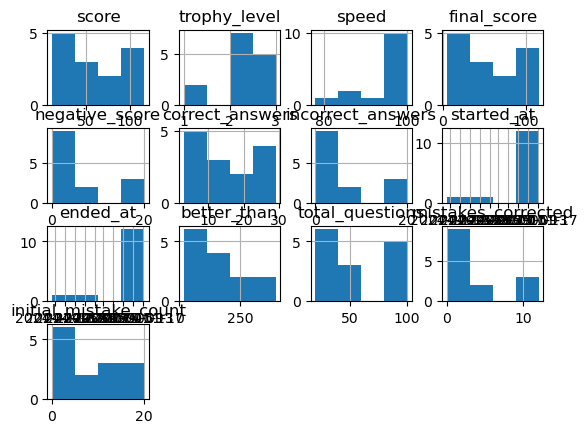

<Figure size 1300x2000 with 0 Axes>

In [158]:
df_h.hist(bins=4)
plt.figure(figsize=(13,20))

In [159]:
df_h.columns

Index(['user_id', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'started_at', 'ended_at', 'duration', 'better_than', 'total_questions',
       'rank_text', 'mistakes_corrected', 'initial_mistake_count',
       'response_map', 'quiz'],
      dtype='object')

In [160]:
df_h=df_h.drop(columns=['started_at','ended_at'])

In [161]:
df_h.columns

Index(['user_id', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'duration', 'better_than', 'total_questions', 'rank_text',
       'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')

In [162]:
df_h.source

0     exam
1     exam
2     live
3     live
4     exam
5     exam
6     exam
7     live
8     live
9     live
10    exam
11    exam
12    exam
13    exam
Name: source, dtype: object

In [163]:
df_h['quiz']


0     {'id': 51, 'name': None, 'title': 'Human Physi...
1     {'id': 6, 'name': None, 'title': 'Human Physio...
2     {'id': 51, 'name': None, 'title': 'Human Physi...
3     {'id': 6, 'name': None, 'title': 'Human Physio...
4     {'id': 51, 'name': None, 'title': 'Human Physi...
5     {'id': 57, 'name': None, 'title': 'Reproductio...
6     {'id': 6, 'name': None, 'title': 'Human Physio...
7     {'id': 20, 'name': None, 'title': 'PRINCIPLES ...
8     {'id': 24, 'name': None, 'title': 'MICROBES IN...
9     {'id': 18, 'name': None, 'title': 'REPRODUCTIV...
10    {'id': 25, 'name': None, 'title': 'HUMAN HEALT...
11    {'id': 18, 'name': None, 'title': 'REPRODUCTIV...
12    {'id': 58, 'name': None, 'title': 'Reproductio...
13    {'id': 50, 'name': None, 'title': 'Human Physi...
Name: quiz, dtype: object

In [164]:
df_h.accuracy
def pertonum(x):
    f=float(x.replace("%",""))/100
    return f

l=map(pertonum,df_h.accuracy)
df_h['accuracy']=list(l)
df_h.accuracy

0     0.90
1     1.00
2     0.96
3     0.90
4     0.31
5     0.38
6     0.50
7     0.30
8     1.00
9     1.00
10    0.93
11    0.84
12    0.43
13    0.66
Name: accuracy, dtype: float64

In [165]:
type(df_h.speed)
#speed is series data

pandas.core.series.Series

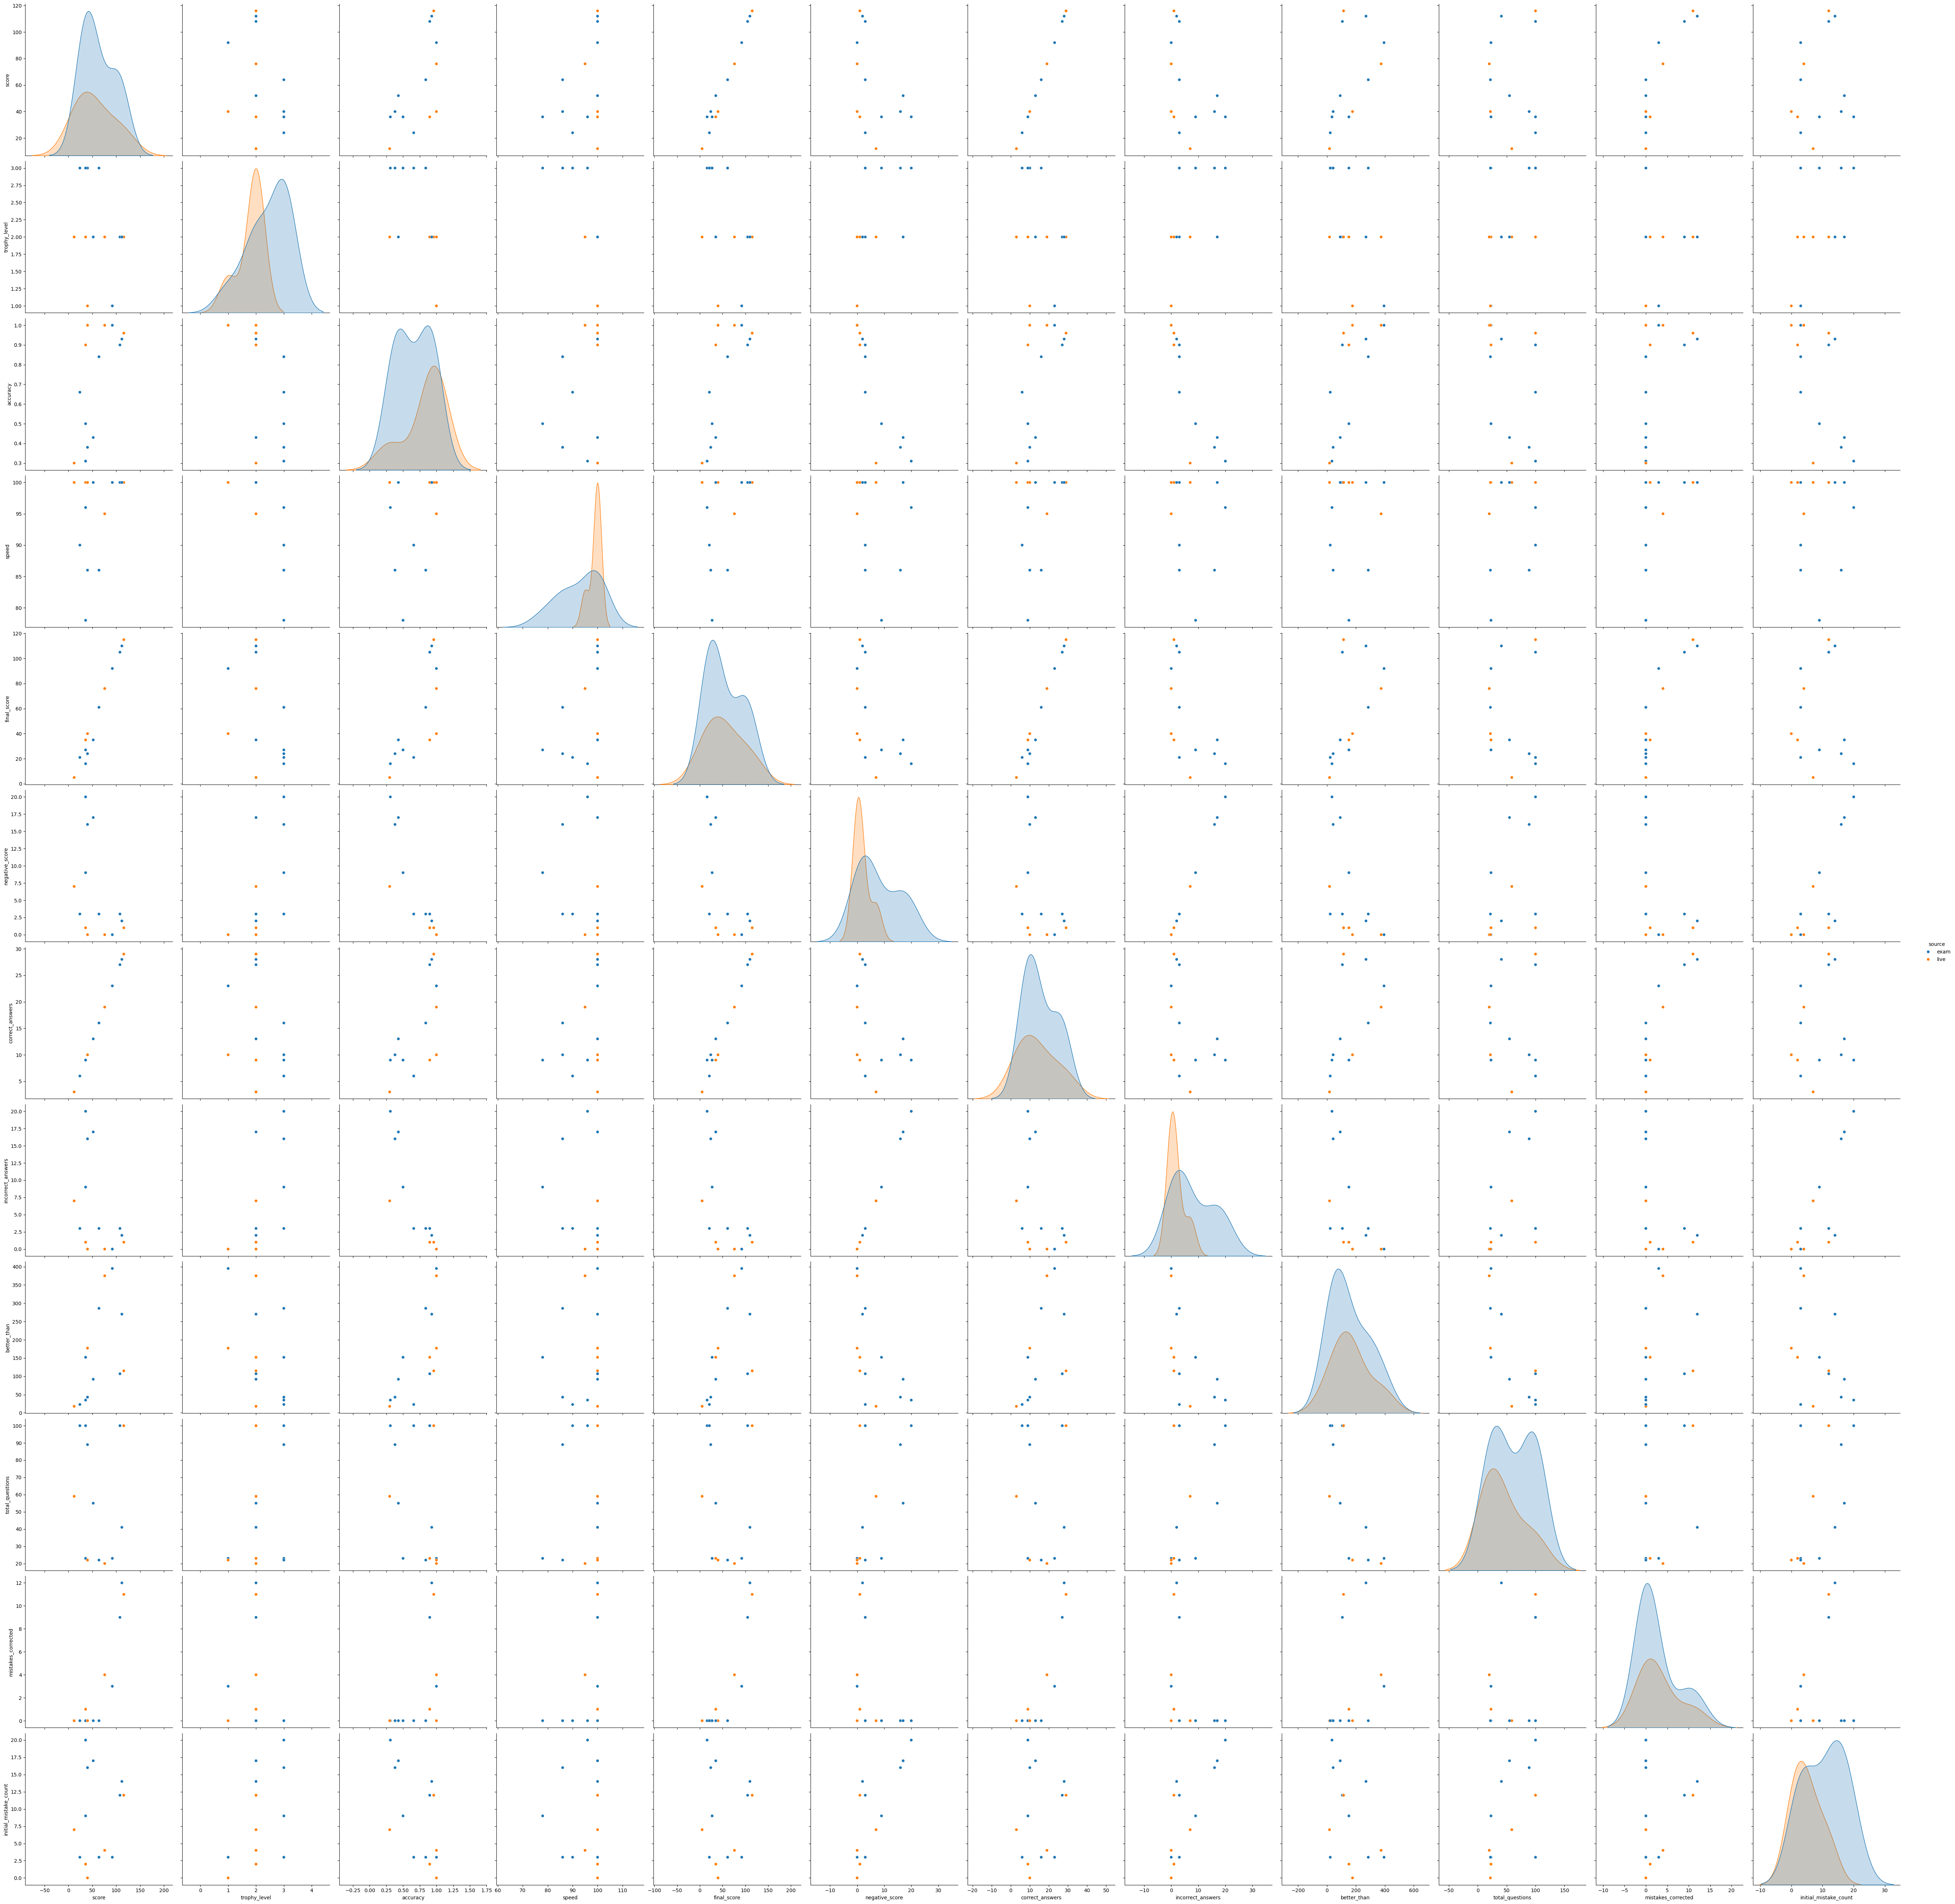

In [166]:
sns.pairplot(data=df_h,hue='source',height=4.5)

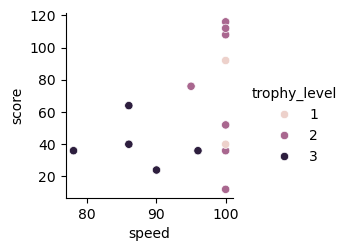

In [167]:
mapp=sns.pairplot(x_vars='speed',y_vars='score',hue='trophy_level',data=df_h)
#level 3 ppl are finding it hard to match score to speed



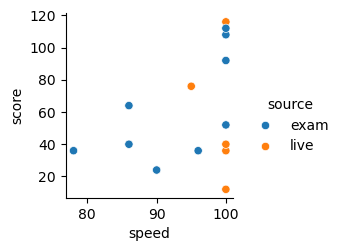

In [168]:
mapp=sns.pairplot(x_vars='speed',y_vars='score',hue='source',data=df_h)




In [169]:
df_h.columns

Index(['user_id', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'duration', 'better_than', 'total_questions', 'rank_text',
       'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')

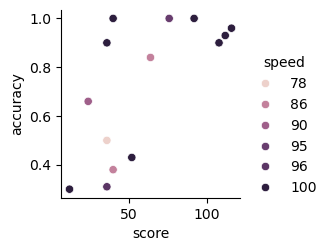

In [170]:
mapp=sns.pairplot(x_vars='score',y_vars='accuracy',hue='speed',data=df_h)





In [171]:
#since speed is series
# s=pd.to_numeric(df_h.speed)
# df_h['speed']=s
len(df_h[df_h.speed>=95])
#10 out of 14 have high speed

10

In [172]:
len(df_h[df_h.accuracy>=0.8])

8

In [173]:
len(df_h[(df_h.speed>=90) & (df_h.accuracy>=0.8) ])
#7 out of 14 ppl have high speed and accuracy

7

In [174]:
df_h.columns

Index(['user_id', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'duration', 'better_than', 'total_questions', 'rank_text',
       'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')

In [175]:
dfas=df_h[(df_h.speed>=95) & (df_h.accuracy>=0.8)]
l=dfas.groupby('trophy_level').size()
l
#no one from trophy level 3

trophy_level
1    2
2    5
dtype: int64

<Axes: xlabel='trophy_level', ylabel='count'>

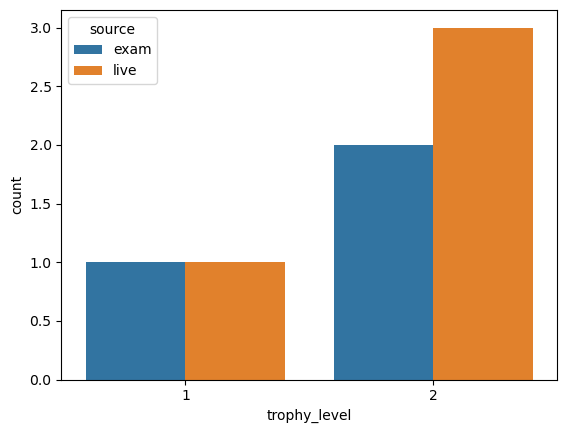

In [176]:
sns.countplot(data=dfas,x='trophy_level',hue='source')
#in level 2, live  performers are doing good

In [177]:
df_h.trophy_level.unique()

array([2, 1, 3], dtype=int64)

In [178]:
df_h.dtypes

user_id                   object
score                      int64
trophy_level               int64
accuracy                 float64
speed                      int64
final_score                int64
negative_score             int64
correct_answers            int64
incorrect_answers          int64
source                    object
duration                  object
better_than                int64
total_questions            int64
rank_text                 object
mistakes_corrected         int64
initial_mistake_count      int64
response_map              object
quiz                      object
dtype: object

In [179]:
df_h.source.head()

0    exam
1    exam
2    live
3    live
4    exam
Name: source, dtype: object

In [180]:
#len(df_h.type.unique())
label=LabelEncoder()
df_h['source']=label.fit_transform(df_h.source)
df_h.source.head()
#0 exam 1 live

0    0
1    0
2    1
3    1
4    0
Name: source, dtype: int32

In [181]:
df_h.rank_text

0      Topic Rank - #-171
1     Topic Rank - #-9140
2      Topic Rank - #-418
3     Topic Rank - #-1598
4      Topic Rank - #2023
5      Topic Rank - #1810
6     Topic Rank - #-1598
7      Topic Rank - #2556
8     Topic Rank - #-8479
9     Topic Rank - #-2380
10    Topic Rank - #-5215
11    Topic Rank - #-5764
12      Topic Rank - #301
13     Topic Rank - #2392
Name: rank_text, dtype: object

In [182]:
df_h.columns

Index(['user_id', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'duration', 'better_than', 'total_questions', 'rank_text',
       'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz'],
      dtype='object')

In [183]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_h['speed'],
    y=df_h['accuracy'],
    z=df_h['trophy_level'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_h['source'], 
        colorscale='Rainbow',
        opacity=0.8,
         colorbar=dict(title="Source")
    )
)])
fig.update_layout(
    scene=dict(
        xaxis_title="Speed",
        yaxis_title="Accuracy",
        zaxis_title="Trophy Level"
    ),
    #margin=dict(l=0, r=0, b=0, t=0)
)
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
#majority in level 3 have high speed but low accuracy

In [184]:
df_h.quiz

0     {'id': 51, 'name': None, 'title': 'Human Physi...
1     {'id': 6, 'name': None, 'title': 'Human Physio...
2     {'id': 51, 'name': None, 'title': 'Human Physi...
3     {'id': 6, 'name': None, 'title': 'Human Physio...
4     {'id': 51, 'name': None, 'title': 'Human Physi...
5     {'id': 57, 'name': None, 'title': 'Reproductio...
6     {'id': 6, 'name': None, 'title': 'Human Physio...
7     {'id': 20, 'name': None, 'title': 'PRINCIPLES ...
8     {'id': 24, 'name': None, 'title': 'MICROBES IN...
9     {'id': 18, 'name': None, 'title': 'REPRODUCTIV...
10    {'id': 25, 'name': None, 'title': 'HUMAN HEALT...
11    {'id': 18, 'name': None, 'title': 'REPRODUCTIV...
12    {'id': 58, 'name': None, 'title': 'Reproductio...
13    {'id': 50, 'name': None, 'title': 'Human Physi...
Name: quiz, dtype: object

In [185]:
qdf=pd.json_normalize(df_h.quiz)
qdf

,id,name,title,description,difficulty_level,topic,time,is_published,created_at,updated_at,...,exam_id,show_unanswered,ends_at,lives,live_count,coin_count,questions_count,daily_date,max_mistake_count,reading_materials
0,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
1,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
2,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
3,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
4,51,None,Human Physiology (15),,None,Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,True,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
5,57,None,Reproduction,,None,Human Reproduction,2024-07-12T00:00:00.000+05:30,True,2024-07-12T16:57:41.878+05:30,2024-09-23T18:43:28.935+05:30,...,None,False,2025-01-18,None,Free Test,-1,89,"January 17, 2025",15,[]
6,6,None,Human Physiology PYQ,,None,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,True,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
7,20,None,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,,None,principles of inheritance and variation,2024-06-07T00:00:00.000+05:30,True,2024-06-07T15:40:47.746+05:30,2024-06-20T18:17:03.628+05:30,...,None,False,2025-01-18,None,Free Test,-1,59,"January 17, 2025",15,[]
8,24,None,MICROBES IN HUMAN WELFARE PYQ,,None,microbes in human welfare,2024-06-10T00:00:00.000+05:30,True,2024-06-10T13:19:22.991+05:30,2024-06-24T14:01:22.154+05:30,...,None,False,2025-01-18,None,Free Test,-1,20,"January 17, 2025",15,[]
9,18,None,REPRODUCTIVE HEALTH PYQ,,None,reproductive health,2024-06-07T00:00:00.000+05:30,True,2024-06-07T15:24:37.590+05:30,2024-06-14T15:16:51.212+05:30,...,None,False,2025-01-18,None,Free Test,-1,22,"January 17, 2025",15,[]


In [186]:
#len(qdf.difficulty_level.unique())
#len(qdf.is_published.unique())
#len(qdf.exam_id.unique())
#len(qdf.show_unanswered.unique())
print(len(qdf.live_count.unique()),len(qdf.coin_count.unique()))
len(qdf.max_mistake_count.unique())
len(qdf.description.unique())
len(qdf.lives.unique())
qdf.reading_materials




1 1


0     []
1     []
2     []
3     []
4     []
5     []
6     []
7     []
8     []
9     []
10    []
11    []
12    []
13    []
Name: reading_materials, dtype: object

In [187]:
qdf.reading_materials

0     []
1     []
2     []
3     []
4     []
5     []
6     []
7     []
8     []
9     []
10    []
11    []
12    []
13    []
Name: reading_materials, dtype: object

In [188]:
qdf.drop(columns=[
    "difficulty_level",
    "is_published",
    "exam_id",
    "show_unanswered",
    "live_count",
    "coin_count",
    "max_mistake_count",
    "description",
    "lives",
    "reading_materials","id","name"
],axis=0,inplace=True)

In [189]:
qdf

,title,topic,time,created_at,updated_at,duration,end_time,negative_marks,correct_answer_marks,shuffle,...,lock_solutions,is_form,show_mastery_option,reading_material,quiz_type,is_custom,banner_id,ends_at,questions_count,daily_date
0,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,100,"January 17, 2025"
1,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,23,"January 17, 2025"
2,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,100,"January 17, 2025"
3,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,23,"January 17, 2025"
4,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,100,"January 17, 2025"
5,Reproduction,Human Reproduction,2024-07-12T00:00:00.000+05:30,2024-07-12T16:57:41.878+05:30,2024-09-23T18:43:28.935+05:30,89,2024-07-13T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,89,"January 17, 2025"
6,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,23,"January 17, 2025"
7,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,2024-06-07T00:00:00.000+05:30,2024-06-07T15:40:47.746+05:30,2024-06-20T18:17:03.628+05:30,59,2024-06-08T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,59,"January 17, 2025"
8,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,2024-06-10T00:00:00.000+05:30,2024-06-10T13:19:22.991+05:30,2024-06-24T14:01:22.154+05:30,20,2024-06-11T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,20,"January 17, 2025"
9,REPRODUCTIVE HEALTH PYQ,reproductive health,2024-06-07T00:00:00.000+05:30,2024-06-07T15:24:37.590+05:30,2024-06-14T15:16:51.212+05:30,22,2024-06-08T00:00:00.000+05:30,1.0,4.0,True,...,False,False,False,None,None,False,None,2025-01-18,22,"January 17, 2025"


In [190]:
# len(df.shuffle.unique())
# len(df.lock_solutions.unique())
# len(df.is_form.unique())
# len(df.show_mastery_option.unique())
qdf.drop(columns=['shuffle', 'lock_solutions', 'is_form', 'show_mastery_option'],axis=0,inplace=True)
	

In [191]:
qdf.show_answers
qdf.drop(columns=['show_answers'],axis=0,inplace=True)

In [192]:
qdf.drop(columns=['quiz_type'],axis=0,inplace=True)
qdf

,title,topic,time,created_at,updated_at,duration,end_time,negative_marks,correct_answer_marks,reading_material,is_custom,banner_id,ends_at,questions_count,daily_date
0,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,100,"January 17, 2025"
1,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,23,"January 17, 2025"
2,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,100,"January 17, 2025"
3,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,23,"January 17, 2025"
4,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,100,"January 17, 2025"
5,Reproduction,Human Reproduction,2024-07-12T00:00:00.000+05:30,2024-07-12T16:57:41.878+05:30,2024-09-23T18:43:28.935+05:30,89,2024-07-13T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,89,"January 17, 2025"
6,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,23,"January 17, 2025"
7,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,2024-06-07T00:00:00.000+05:30,2024-06-07T15:40:47.746+05:30,2024-06-20T18:17:03.628+05:30,59,2024-06-08T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,59,"January 17, 2025"
8,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,2024-06-10T00:00:00.000+05:30,2024-06-10T13:19:22.991+05:30,2024-06-24T14:01:22.154+05:30,20,2024-06-11T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,20,"January 17, 2025"
9,REPRODUCTIVE HEALTH PYQ,reproductive health,2024-06-07T00:00:00.000+05:30,2024-06-07T15:24:37.590+05:30,2024-06-14T15:16:51.212+05:30,22,2024-06-08T00:00:00.000+05:30,1.0,4.0,None,False,None,2025-01-18,22,"January 17, 2025"


In [193]:
qdf.banner_id
qdf.is_custom
qdf.drop(columns=['banner_id','is_custom'],axis=0,inplace=True)

In [194]:
qdf.drop(columns=['reading_material'],inplace=True)

In [195]:
qdf.drop(columns=['correct_answer_marks','negative_marks'],axis=0,inplace=True)

In [196]:
qdf

,title,topic,time,created_at,updated_at,duration,end_time,ends_at,questions_count,daily_date
0,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,2025-01-18,100,"January 17, 2025"
1,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,2025-01-18,23,"January 17, 2025"
2,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,2025-01-18,100,"January 17, 2025"
3,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,2025-01-18,23,"January 17, 2025"
4,Human Physiology (15),Body Fluids and Circulation,2024-07-12T00:00:00.000+05:30,2024-07-12T11:17:37.658+05:30,2024-09-23T18:43:27.373+05:30,100,2024-07-13T00:00:00.000+05:30,2025-01-18,100,"January 17, 2025"
5,Reproduction,Human Reproduction,2024-07-12T00:00:00.000+05:30,2024-07-12T16:57:41.878+05:30,2024-09-23T18:43:28.935+05:30,89,2024-07-13T00:00:00.000+05:30,2025-01-18,89,"January 17, 2025"
6,Human Physiology PYQ,Body Fluids and Circulation,2024-04-25T00:00:00.000+05:30,2024-04-26T15:26:29.886+05:30,2024-06-05T18:27:32.163+05:30,23,2024-04-26T00:00:00.000+05:30,2025-01-18,23,"January 17, 2025"
7,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,2024-06-07T00:00:00.000+05:30,2024-06-07T15:40:47.746+05:30,2024-06-20T18:17:03.628+05:30,59,2024-06-08T00:00:00.000+05:30,2025-01-18,59,"January 17, 2025"
8,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,2024-06-10T00:00:00.000+05:30,2024-06-10T13:19:22.991+05:30,2024-06-24T14:01:22.154+05:30,20,2024-06-11T00:00:00.000+05:30,2025-01-18,20,"January 17, 2025"
9,REPRODUCTIVE HEALTH PYQ,reproductive health,2024-06-07T00:00:00.000+05:30,2024-06-07T15:24:37.590+05:30,2024-06-14T15:16:51.212+05:30,22,2024-06-08T00:00:00.000+05:30,2025-01-18,22,"January 17, 2025"


In [197]:
qdf['created_at']=pd.to_datetime(qdf.created_at)

In [198]:
qdf['updated_at']=pd.to_datetime(qdf.updated_at)
qdf['end_time']=pd.to_datetime(qdf.end_time)

In [199]:
qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   title            14 non-null     object                   
 1   topic            14 non-null     object                   
 2   time             14 non-null     object                   
 3   created_at       14 non-null     datetime64[ns, UTC+05:30]
 4   updated_at       14 non-null     datetime64[ns, UTC+05:30]
 5   duration         14 non-null     int64                    
 6   end_time         14 non-null     datetime64[ns, UTC+05:30]
 7   ends_at          14 non-null     object                   
 8   questions_count  14 non-null     int64                    
 9   daily_date       14 non-null     object                   
dtypes: datetime64[ns, UTC+05:30](3), int64(2), object(5)
memory usage: 1.2+ KB


In [200]:
qdf.drop(columns = [
    "time",
    "created_at",
    "updated_at",
    "end_time",
    "ends_at",
    "daily_date"
],axis=0,inplace=True
)

In [201]:
qdf

,title,topic,duration,questions_count
0,Human Physiology (15),Body Fluids and Circulation,100,100
1,Human Physiology PYQ,Body Fluids and Circulation,23,23
2,Human Physiology (15),Body Fluids and Circulation,100,100
3,Human Physiology PYQ,Body Fluids and Circulation,23,23
4,Human Physiology (15),Body Fluids and Circulation,100,100
5,Reproduction,Human Reproduction,89,89
6,Human Physiology PYQ,Body Fluids and Circulation,23,23
7,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,59,59
8,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,20,20
9,REPRODUCTIVE HEALTH PYQ,reproductive health,22,22


In [202]:
qdf['title']=label.fit_transform(qdf.title)

In [203]:
qdf['topic']=label.fit_transform(qdf.topic)

In [204]:
qdf

,title,topic,duration,questions_count
0,2,0,100,100
1,3,1,23,23
2,2,0,100,100
3,3,1,23,23
4,2,0,100,100
5,7,2,89,89
6,3,1,23,23
7,5,7,59,59
8,4,6,20,20
9,6,8,22,22


In [205]:
udf=df

In [206]:
df_h.drop(columns=['user_id','better_than','quiz'],axis=0,inplace=True)

In [207]:
df_h["rank_text"] = df_h["rank_text"].astype(str)

df_h["rank"] = (
    df_h["rank_text"]
    .str.extract(r"#-(\d+)")  #Extract values
    .fillna(-1)              #Replace NaN
    .astype(int)           
)

In [208]:
df_h.columns

Index(['score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'duration', 'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'rank'],
      dtype='object')

In [209]:
df_h.drop(columns=['rank_text'],inplace=True)

In [210]:
df_h.drop(columns=['response_map'],inplace=True)

In [211]:
df_h

,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,duration,total_questions,mistakes_corrected,initial_mistake_count,rank
0,108,2,0.90,100,105,3,27,3,0,15:00,100,9,12,171
1,92,1,1.00,100,92,0,23,0,0,15:00,23,3,3,9140
2,116,2,0.96,100,115,1,29,1,1,15:00,100,11,12,418
3,36,2,0.90,100,35,1,9,1,1,15:00,23,1,2,1598
4,36,3,0.31,96,16,20,9,20,0,15:00,100,0,20,-1
5,40,3,0.38,86,24,16,10,16,0,15:00,89,0,16,-1
6,36,3,0.50,78,27,9,9,9,0,15:00,23,0,9,1598
7,12,2,0.30,100,5,7,3,7,1,15:00,59,0,7,-1
8,76,2,1.00,95,76,0,19,0,1,15:00,20,4,4,8479
9,40,1,1.00,100,40,0,10,0,1,15:00,22,0,0,2380


In [212]:
len(df_h.duration.unique())


1

In [213]:
df_h.drop(columns=['duration'],inplace=True)

In [214]:
df=pd.concat((df_h,qdf),axis=1)

In [215]:
df

,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,source,total_questions,mistakes_corrected,initial_mistake_count,rank,title,topic,duration,questions_count
0,108,2,0.90,100,105,3,27,3,0,100,9,12,171,2,0,100,100
1,92,1,1.00,100,92,0,23,0,0,23,3,3,9140,3,1,23,23
2,116,2,0.96,100,115,1,29,1,1,100,11,12,418,2,0,100,100
3,36,2,0.90,100,35,1,9,1,1,23,1,2,1598,3,1,23,23
4,36,3,0.31,96,16,20,9,20,0,100,0,20,-1,2,0,100,100
5,40,3,0.38,86,24,16,10,16,0,89,0,16,-1,7,2,89,89
6,36,3,0.50,78,27,9,9,9,0,23,0,9,1598,3,1,23,23
7,12,2,0.30,100,5,7,3,7,1,59,0,7,-1,5,7,59,59
8,76,2,1.00,95,76,0,19,0,1,20,4,4,8479,4,6,20,20
9,40,1,1.00,100,40,0,10,0,1,22,0,0,2380,6,8,22,22


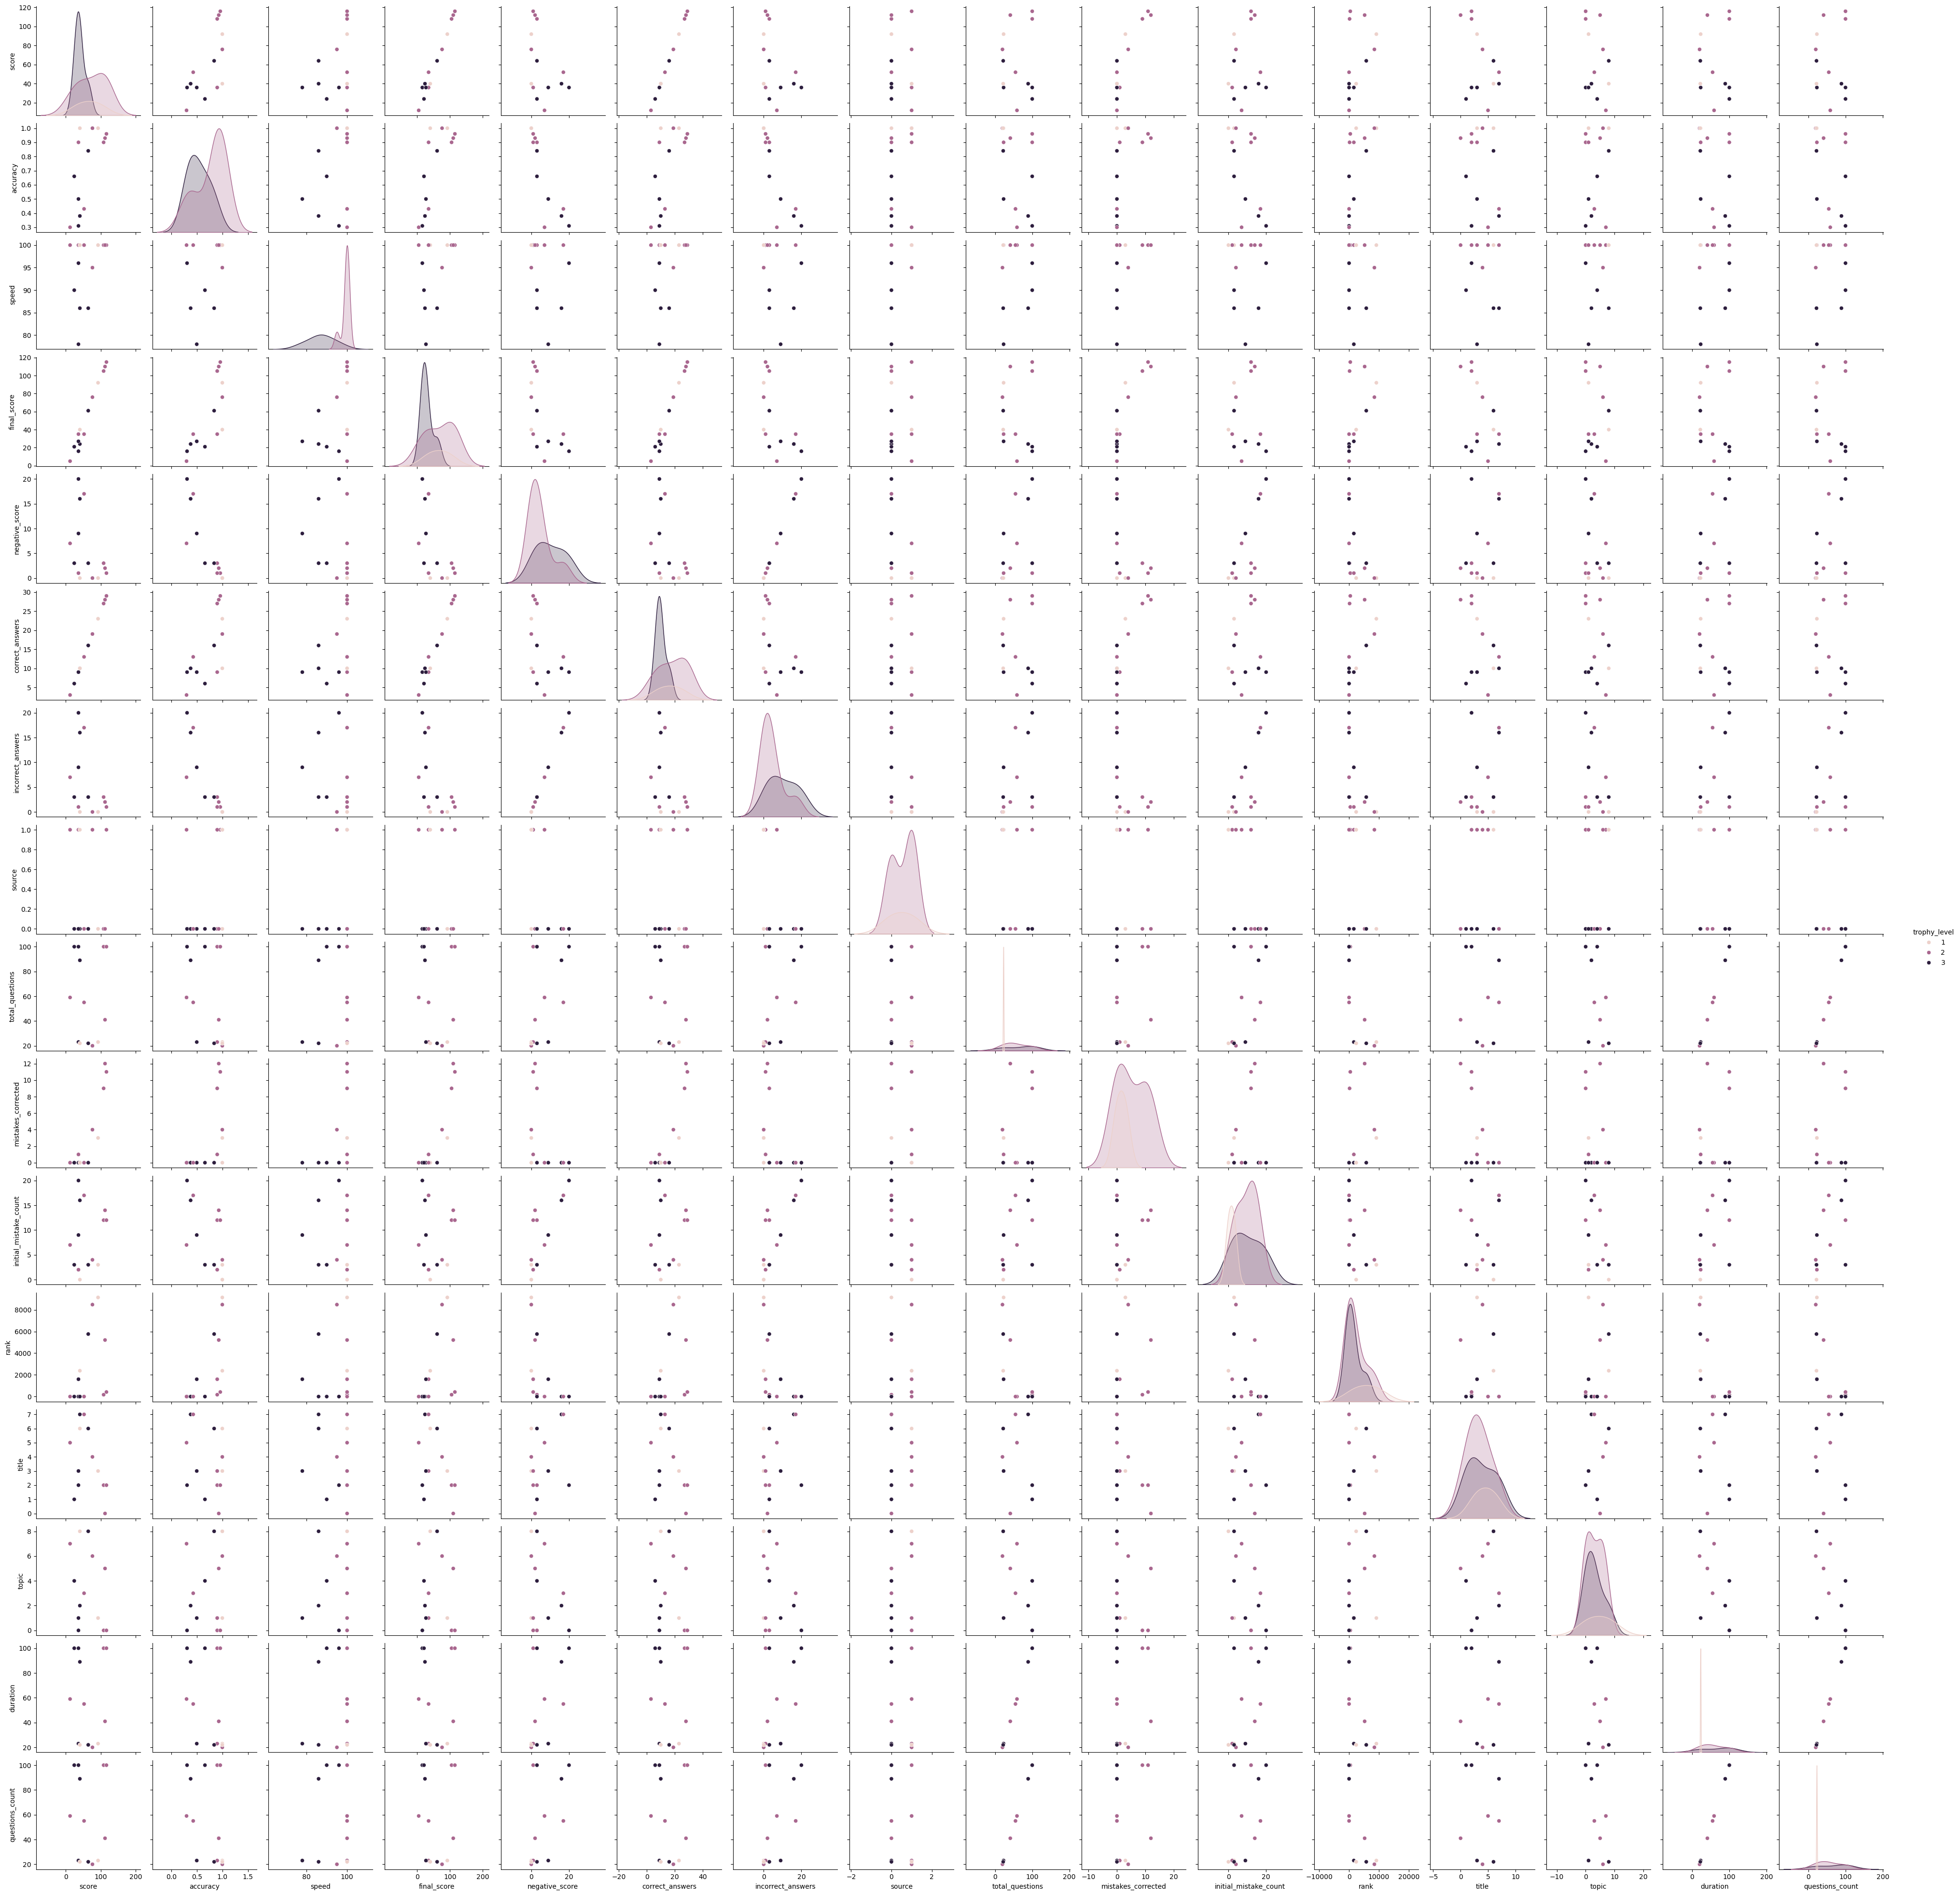

In [216]:
sns.pairplot(data=df,hue='trophy_level')

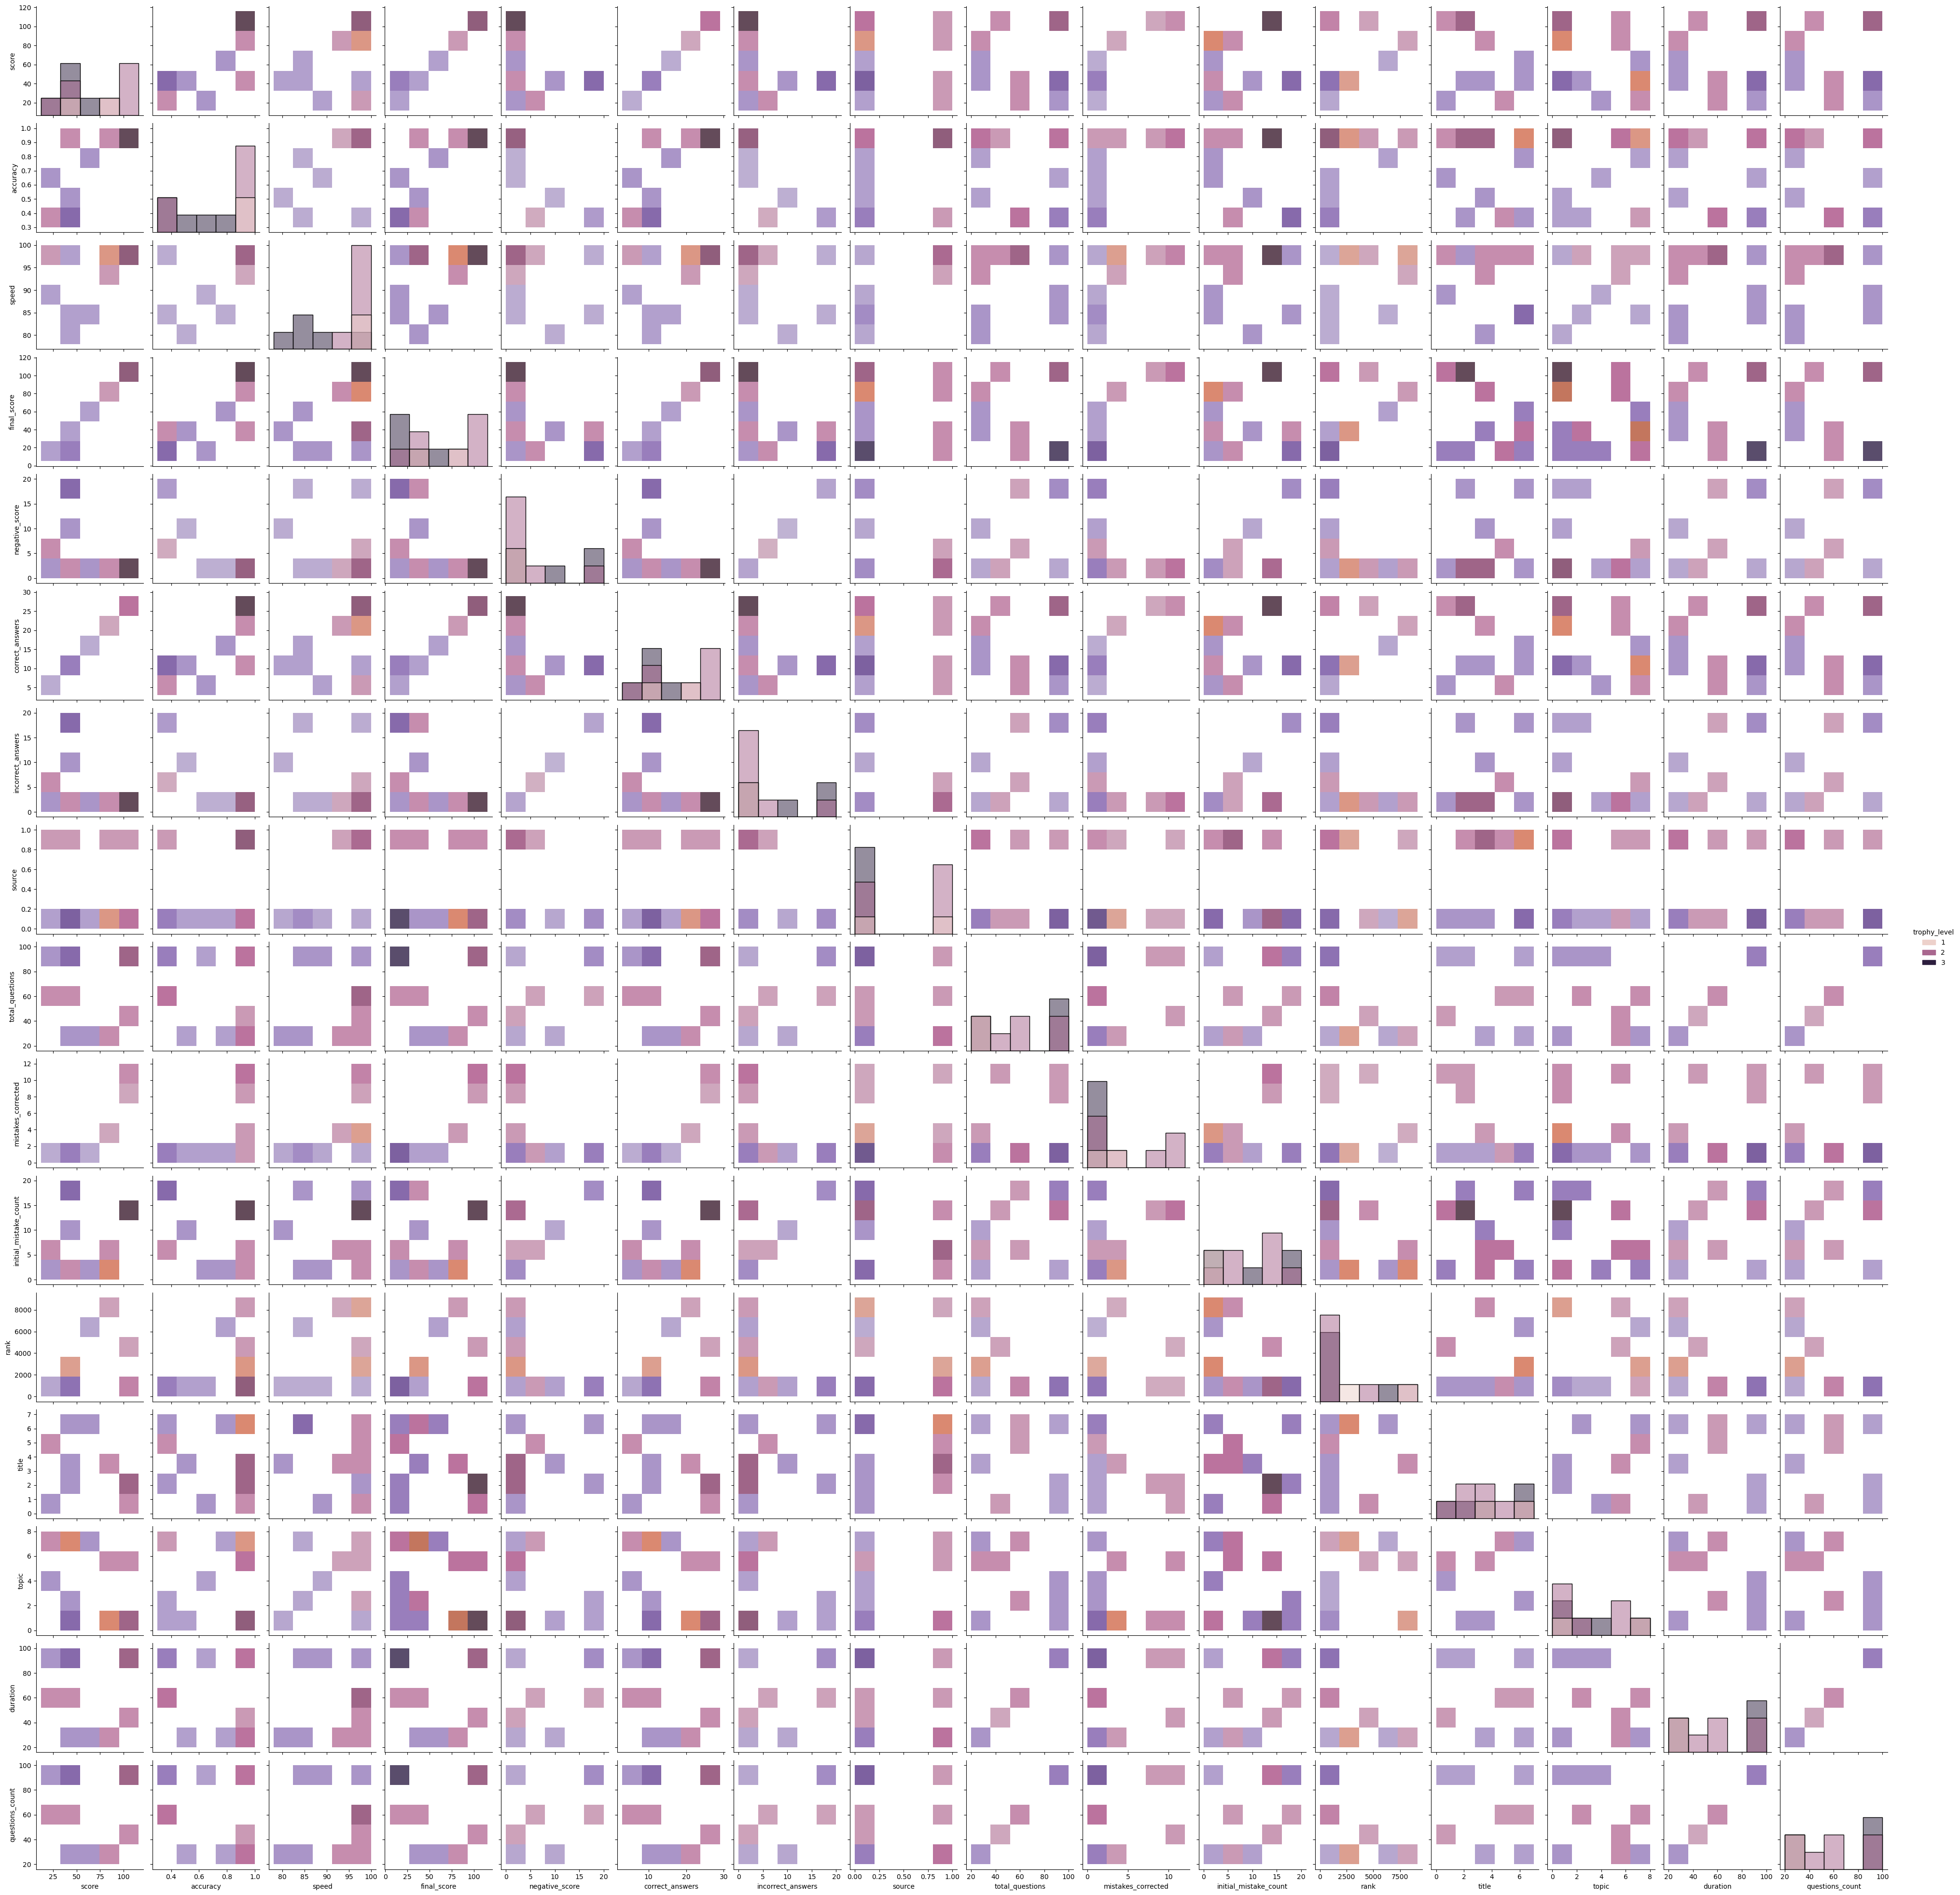

In [217]:
sns.pairplot(data=df,hue='trophy_level',kind='hist')

In [218]:
corr=df.corr()

<Figure size 1000x1000 with 0 Axes>

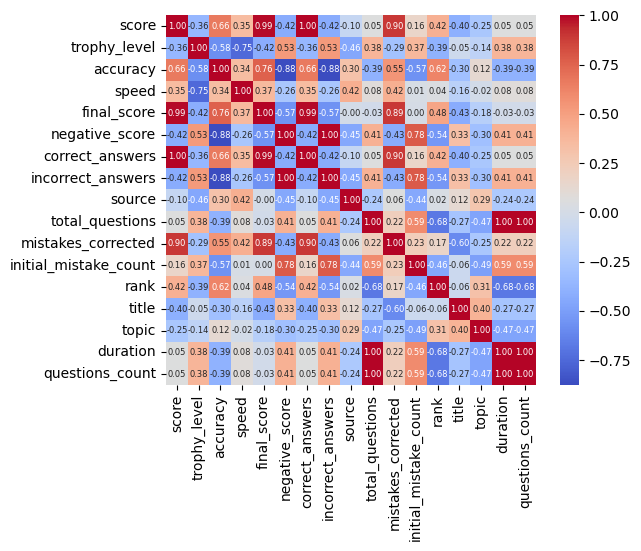

<Figure size 1000x1000 with 0 Axes>

In [219]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='0.2f',square=True,annot_kws={"fontsize":6})
plt.figure(figsize=(10,10))

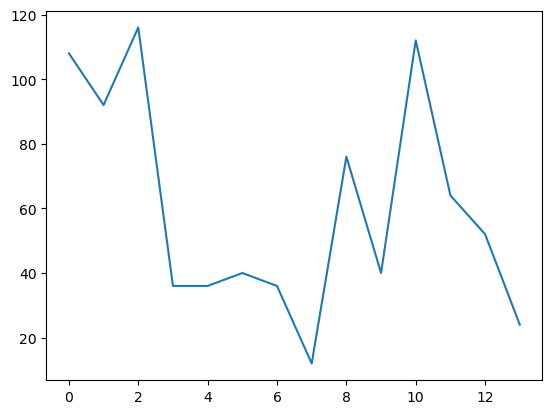

In [220]:
plt.plot(df.score)

CURRENT DATA ANALYSIS


In [225]:
udf=pd.read_json('LLQT.json')

In [229]:
udf=np.transpose(udf)

In [230]:
udf

,id,name,title,description,difficulty_level,topic,time,is_published,created_at,updated_at,...,exam_id,show_unanswered,ends_at,lives,live_count,coin_count,questions_count,daily_date,max_mistake_count,questions
quiz,43,None,Structural Organisation in Animals and Plants (7),,None,Structural Organisation in Animals,2024-07-03T00:00:00.000+05:30,True,2024-07-03T11:00:08.958+05:30,2024-09-23T18:43:27.751+05:30,...,None,False,2025-01-18,None,Free Test,-1,128,"January 17, 2025",15,"[{'id': 1827, 'description': 'The tissue which..."


In [234]:
qcdf=json.loads('{"id":336566,"quiz_id":43,"user_id":"7ZXdz3zHuNcdg9agb5YpaOGLQqw2","submitted_at":"2025-01-17T15:51:29.859+05:30","created_at":"2025-01-17T15:51:29.871+05:30","updated_at":"2025-01-17T15:51:29.871+05:30","score":32,"trophy_level":2,"accuracy":"80 %","speed":"100","final_score":"30.0","negative_score":"2.0","correct_answers":8,"incorrect_answers":2,"source":"live","type":"topic","started_at":"2025-01-17T16:20:44.000+05:30","ended_at":"2025-01-17T16:21:28.000+05:30","duration":"15:00","better_than":24,"total_questions":128,"rank_text":"Topic Rank - #2402","mistakes_corrected":6,"initial_mistake_count":8,"response_map":{"1837":7363,"1848":7407,"1852":7423,"1862":7464,"1877":7525,"1878":7529,"1900":7617,"1917":7685,"1934":7750,"1964":7872},"quiz":{"id":43,"name":null,"title":"Structural Organisation in Animals and Plants (7)","description":"","difficulty_level":null,"topic":"Structural Organisation in Animals","time":"2024-07-03T00:00:00.000+05:30","is_published":true,"created_at":"2024-07-03T11:00:08.958+05:30","updated_at":"2024-09-23T18:43:27.751+05:30","duration":128,"end_time":"2024-07-04T00:00:00.000+05:30","negative_marks":"1.0","correct_answer_marks":"4.0","shuffle":true,"show_answers":true,"lock_solutions":false,"is_form":false,"show_mastery_option":false,"reading_material":null,"quiz_type":null,"is_custom":false,"banner_id":null,"exam_id":null,"show_unanswered":false,"ends_at":"2025-01-18","lives":null,"live_count":"Free Test","coin_count":-1,"questions_count":128,"daily_date":"January 17, 2025","max_mistake_count":15,"reading_materials":[]},"next_steps":[{"pageType":"resultPage"}]}')

In [237]:
qcdf=pd.DataFrame([qcdf])

In [238]:
qcdf

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,2025-01-17T16:21:28.000+05:30,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}]


In [240]:
q=pd.json_normalize(qcdf.quiz)
q

,id,name,title,description,difficulty_level,topic,time,is_published,created_at,updated_at,...,exam_id,show_unanswered,ends_at,lives,live_count,coin_count,questions_count,daily_date,max_mistake_count,reading_materials
0,43,None,Structural Organisation in Animals and Plants (7),,None,Structural Organisation in Animals,2024-07-03T00:00:00.000+05:30,True,2024-07-03T11:00:08.958+05:30,2024-09-23T18:43:27.751+05:30,...,None,False,2025-01-18,None,Free Test,-1,128,"January 17, 2025",15,[]


In [241]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, quiz to quiz
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1 non-null      object
 1   name                  0 non-null      object
 2   title                 1 non-null      object
 3   description           1 non-null      object
 4   difficulty_level      0 non-null      object
 5   topic                 1 non-null      object
 6   time                  1 non-null      object
 7   is_published          1 non-null      object
 8   created_at            1 non-null      object
 9   updated_at            1 non-null      object
 10  duration              1 non-null      object
 11  end_time              1 non-null      object
 12  negative_marks        1 non-null      object
 13  correct_answer_marks  1 non-null      object
 14  shuffle               1 non-null      object
 15  show_answers          1 non-null      objec